In [41]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path) 

# Combine the data into a single dataset and cleaning data
mouse = pd.merge(mouse_metadata,study_results,on=["Mouse ID"])
mouse = mouse.drop_duplicates(subset = ["Mouse ID","Timepoint"], keep = False) 
mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Count mouse 
mouse["Mouse ID"].nunique()

249

In [4]:
#Summary Stats
Drugs = mouse.groupby("Drug Regimen")  
x = Drugs["Tumor Volume (mm3)"].mean() 
y = Drugs["Tumor Volume (mm3)"].median() 
z = Drugs["Tumor Volume (mm3)"].var() 
a = Drugs["Tumor Volume (mm3)"].std()  
b = Drugs["Tumor Volume (mm3)"].sem()  

sumstats = pd.DataFrame({"Mean Tumor Volume": x,"Median Tumor Volume": y,"Tumor Volume Variance":z,"Tumor Volume Std. Dev.":a,"Tumor Volume Std. Err.":b})

In [5]:
sumstats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, 'Mouses per Drug')

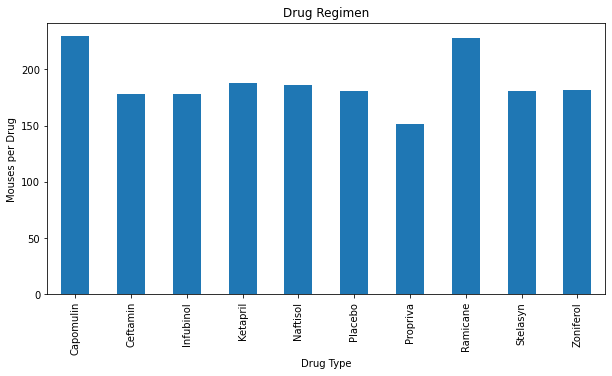

In [6]:
# Using Pandas to plot drug reg.
drugplotpoints = Drugs["Mouse ID"].count() 
drugplotpoints.plot(kind="bar",figsize=(10,5)) 
plt.title("Drug Regimen")
plt.xlabel("Drug Type")
plt.ylabel("Mouses per Drug") 


<Figure size 1440x360 with 0 Axes>

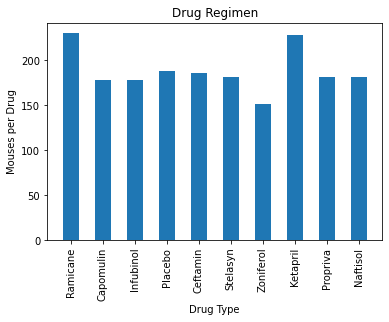

<Figure size 1440x360 with 0 Axes>

In [7]:
#Using mat plot to plot drug reg.
x_axis = mouse["Drug Regimen"].unique()
x_axis 
y_axis = Drugs["Mouse ID"].count()  
y_axis 

 
plt.title("Drug Regimen")
plt.xlabel("Drug Type")
plt.ylabel("Mouses per Drug") 
plt.bar(x_axis, y_axis,alpha=1, align='center',width = .5)
plt.xticks(rotation="vertical")
plt.figure(figsize=(20, 5))

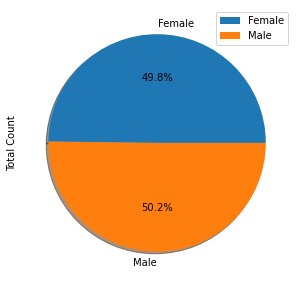

In [8]:
#Using Pandas for pie chart 

gendermice = mouse.groupby(["Mouse ID","Sex"]) 
mouse_gender_df = pd.DataFrame(gendermice.size())
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"] 
mouse_gender.plot.pie(y= 'Total Count',figsize=(5,5),shadow = True, autopct="%1.1f%%")

(-1.1016567410624358,
 1.1000789182960846,
 -1.1009310601339266,
 1.1017615853311924)

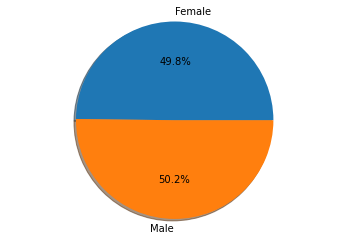

In [9]:
#Using Mat plot lib for pie chart 

values = [49.8, 50.2]
labels = ["Female","Male"]
plt.pie(values,autopct="%1.1f%%", shadow=True,labels=labels) 

plt.axis("equal")

In [99]:
#Best Drugs 
Drugbest = mouse.loc[mouse["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])]

Drugbest = Drugbest[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
Drugbest = Drugbest.groupby(["Drug Regimen","Timepoint"]) 
x= Drugbest.max() 
x = x.reset_index() 
topdrug = x["Drug Regimen"].groupby(x["Tumor Volume (mm3)"])  
x =  pd.DataFrame(topdrug.max())
x

,Drug Regimen
Tumor Volume (mm3),
44.471821,Ramicane
45.000000,Ramicane
45.220869,Ramicane
45.261384,Capomulin
45.877545,Ramicane
45.895647,Capomulin
45.941949,Capomulin
46.422943,Ramicane
46.585433,Ramicane


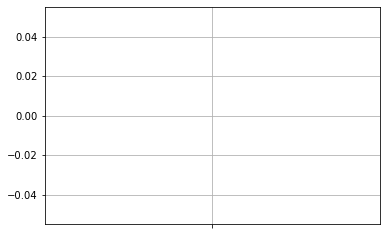

In [95]:
boxplot = x.boxplot()

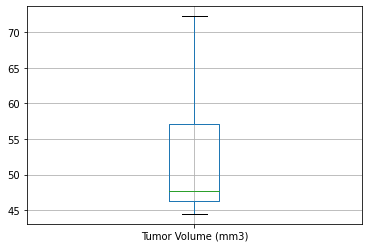

In [49]:
boxplot = x.boxplot(column=["Tumor Volume (mm3)"])

ValueError: Dimensions of labels and X must be compatible

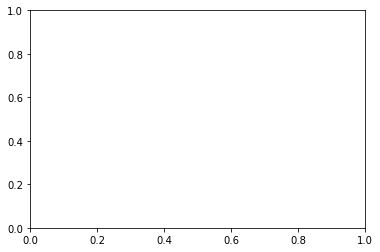